# Simple Linear Regression

Rafiq Islam  
2024-08-29

# Simple Linear Regression

A simple linear regression in multiple predictors/input
variables/features/independent variables/ explanatory
variables/regressors/ covariates (many names) often takes the form

$$
 y=f(\mathbf{x})+\epsilon =\mathbf{\beta}\mathbf{x}+\epsilon
 $$

where $\mathbf{\beta} \in \mathbb{R}^d$ are regression parameters or
constant values that we aim to estimate and
$\epsilon \sim \mathcal{N}(0,1)$ is a normally distributed error term
independent of $x$ or also called the white noise.

In this case, the model:

$$
y=f(x)+\epsilon=\beta_0+\beta_1 x+\epsilon
$$

Therefore, in our model we need to estimate the parameters
$\beta_0,\beta_1$. The true relationship between the explanatory
variables and the dependent variable is $y=f(x)$. But our model is
$y=f(x)+\epsilon$. Here, this $f(x)$ is the working model with the data.
In other words, $\hat{y}=f(x)=\hat{\beta}_0+\hat{\beta}_1 x$. Therefore,
there should be some error in the model prediction which we are calling
$\epsilon=\|y-\hat{y}\|$ where $y$ is the true value and $\hat{y}$ is
the predicted value. This error term is normally distributed with mean 0
and variance 1. To get the best estimate of the parameters
$\beta_0,\beta_1$ we can minimize the error term as much as possible.
So, we define the residual sum of squares (RSS) as:

Using multivariate calculus we see

Setting the partial derivatives to zero we solve for
$\hat{\beta_0},\hat{\beta_1}$ as follows

and,

Therefore, we have the following

Simple Linear Regression `slr` is applicable for a single feature data
set with contineous response variable.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Assumptions of Linear Regressions

-   **Linearity:** The relationship between the feature set and the
    target variable has to be linear.  
-   **Homoscedasticity:** The variance of the residuals has to be
    constant.  
-   **Independence:** All the observations are independent of each
    other.  
-   **Normality:** The distribution of the dependent variable $y$ has to
    be normal.

## Synthetic Data

To implement the algorithm, we need some synthetic data. To generate the
synthetic data we use the linear equation $y(x)=2x+\frac{1}{2}+\xi$
where $\xi\sim \mathbf{N}(0,1)$

In [2]:
X=np.random.random(100)
y=2*X+0.5+np.random.randn(100)

Note that we used two random number generators, `np.random.random(n)`
and `np.random.randn(n)`. The first one generates $n$ random numbers of
values from the range (0,1) and the second one generates values from the
standard normal distribution with mean 0 and variance or standard
deviation 1.

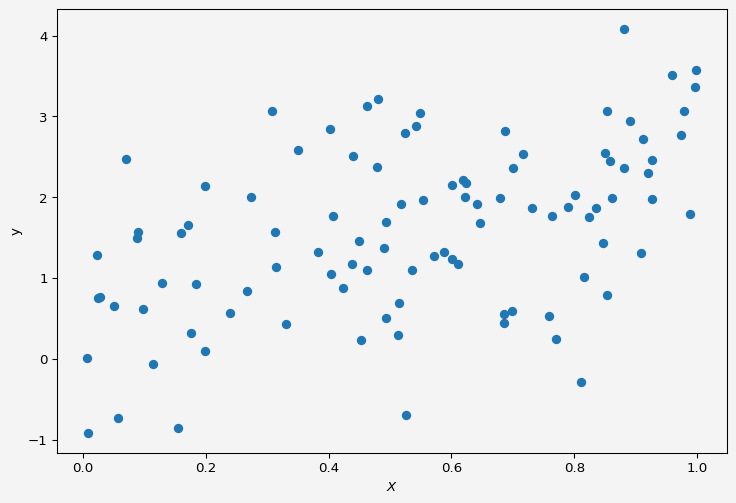

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.xlabel('$X$')
plt.ylabel('y')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## Model

We want to fit a simple linear regression to the above data.

In [4]:
slr=LinearRegression()

Now to fit our data $X$ and $y$ we need to reshape the input variable.
Because if we look at $X$,

In [5]:
X

array([0.38282989, 0.57181055, 0.12908123, 0.75818466, 0.51851918,
       0.62171033, 0.7635335 , 0.54898383, 0.31429962, 0.68597793,
       0.71563468, 0.54205354, 0.0225459 , 0.02481244, 0.15492415,
       0.08898377, 0.46281196, 0.61051619, 0.19904878, 0.55418994,
       0.44032624, 0.85837881, 0.43829912, 0.679008  , 0.40247313,
       0.97914083, 0.17149794, 0.42328542, 0.64186539, 0.8812372 ,
       0.33118637, 0.82311235, 0.34935162, 0.85015787, 0.70022546,
       0.97353701, 0.80177468, 0.06989999, 0.51216884, 0.85282439,
       0.09698594, 0.08735361, 0.92680433, 0.60156004, 0.49337701,
       0.17577445, 0.91945987, 0.92610911, 0.85331909, 0.53629281,
       0.27418875, 0.89143177, 0.99716591, 0.90822098, 0.31241576,
       0.48094681, 0.5252    , 0.05125436, 0.88038317, 0.68558257,
       0.62436996, 0.11440698, 0.95839539, 0.1989429 , 0.91258544,
       0.00790751, 0.267316  , 0.00729315, 0.30813442, 0.58857559,
       0.49353765, 0.99837801, 0.18475454, 0.98874604, 0.78927

It is a one-dimensional array/vector but the `slr` object accepts input
variable as matrix or two-dimensional format.

In [6]:
X=X.reshape(-1,1)
X[:10]

array([[0.38282989],
       [0.57181055],
       [0.12908123],
       [0.75818466],
       [0.51851918],
       [0.62171033],
       [0.7635335 ],
       [0.54898383],
       [0.31429962],
       [0.68597793]])

Now we fit the data to our model

In [7]:
slr.fit(X,y)
slr.predict([[2],[3]])

array([4.19312384, 5.96916635])

We have our $X=2,3$ and the corresponding $y$ values are from the above
cell output, which are pretty close to the model $y=2x+\frac{1}{2}$.

In [8]:
intercept = round(slr.intercept_,4)
slope = slr.coef_

Now our model parameters are: intercept $\beta_0=$ 0.641 and slope
$\beta_1=$ array(\[1.7760425\]).

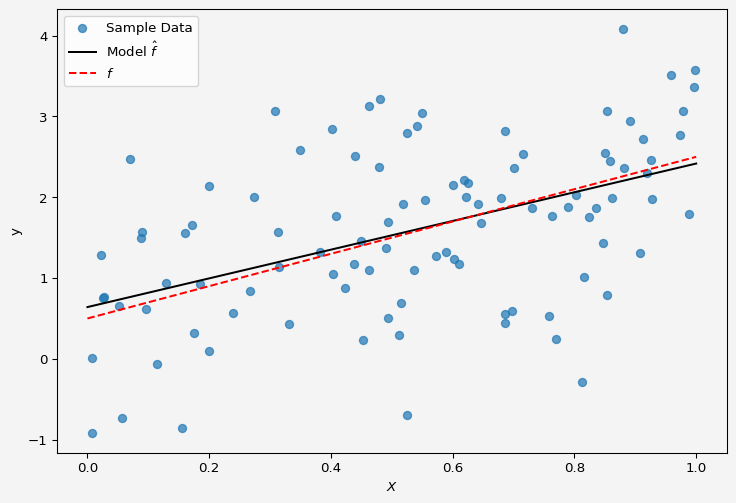

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, alpha=0.7,label="Sample Data")
plt.plot(np.linspace(0,1,100),
    slr.predict(np.linspace(0,1,100).reshape(-1,1)),
    'k',
    label='Model $\hat{f}$'
)
plt.plot(np.linspace(0,1,100),
    2*np.linspace(0,1,100)+0.5,
    'r--',
    label='$f$'
)
plt.xlabel('$X$')
plt.ylabel('y')
plt.legend(fontsize=10)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

So the model fits the data almost perfectly.

Up next [multiple linear
regression](../../dsandml/multiplelinreg/index.qmd).

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**